# Notes

In [1]:
import pandas as pd
from constants import *
from data_sources.specific.coca import Coca
from data_sources.general.official_commodity import OfficialCommodity
import yfinance as yf

/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
ds = Coca()

In [3]:
import geopandas 

# Loads the municipalities
df_geo = geopandas.read_file("/home/minigonche/Dropbox/Projects/malaria_mining/data/cleaned/geo/municipalities/municipalities.shp")
df_geo = df_geo.rename(columns = {'muni_id':ID})

In [4]:
df = ds.createData(df_geo, WEEK)
df

      Loads Data
            No file found for year 2001
      Builds Overlay
      Changes Time Resolution


,ID,date,coca_total
0,5004,2000-12-31,6.519325e+07
1,5031,2000-12-31,1.372497e+10
2,5040,2000-12-31,1.748810e+10
3,5045,2000-12-31,1.445514e+06
4,5051,2000-12-31,2.695436e+09
...,...,...,...
278,97777,2000-12-31,8.497405e+09
279,97889,2000-12-31,3.423971e+10
280,99001,2000-12-31,1.666804e+09
281,99524,2000-12-31,1.724777e+10


In [5]:
df_geo = geopandas.read_file("/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/weather_shapefiles/maximum_2m_air_temperature_2000_2020.shp")
df_geo

,date,maximum_2m,count,geometry
0,947376000000,303,1680,"POLYGON ((-66.25075 9.00112, -66.25075 9.50418..."
1,947376000000,301,810,"POLYGON ((-66.25075 9.50418, -66.25075 9.74672..."
2,947376000000,300,56,"POLYGON ((-65.99922 0.74560, -65.99922 0.99713..."
3,947376000000,299,37386,"POLYGON ((-70.49978 12.69319, -65.98126 12.693..."
4,947376000000,302,1652,"MULTIPOLYGON (((-65.99922 0.99713, -65.99922 1..."
...,...,...,...,...
696887,1578182400000,303,702,"POLYGON ((-80.48007 -3.74597, -80.48007 -3.503..."
696888,1578182400000,303,2968,"MULTIPOLYGON (((-80.24650 -5.00362, -80.24650 ..."
696889,1578182400000,304,728,"POLYGON ((-80.48007 -4.75209, -80.48007 -4.500..."
696890,1578182400000,306,1092,"POLYGON ((-80.48007 -5.12938, -80.48007 -4.752..."


In [7]:
pd.to_datetime(df_geo.date, unit='ms')

0        2000-01-09
1        2000-01-09
2        2000-01-09
3        2000-01-09
4        2000-01-09
            ...    
696887   2020-01-05
696888   2020-01-05
696889   2020-01-05
696890   2020-01-05
696891   2020-01-05
Name: date, Length: 696892, dtype: datetime64[ns]

In [12]:
df_sizes = pd.read_csv('/home/minigonche/Desktop/sizes.csv')
df_sizes

,location_id,date,attribute_name,attribute_value,type
0,intervencion_alcaldia_bogota_1,2021-06-09,graph_size,22919.0,study_area
1,intervencion_alcaldia_bogota_2,2021-06-09,graph_size,865.0,study_area
2,intervencion_alcaldia_bogota_3,2021-06-09,graph_size,1088.0,study_area
3,intervencion_alcaldia_bogota_4,2021-06-09,graph_size,159.0,bogota_study_area
4,intervencion_alcaldia_bogota_5,2021-06-09,graph_size,757.0,bogota_study_area
...,...,...,...,...,...
95,intervencion_alcaldia_bogota_6,2021-06-18,graph_size,191.0,bogota_study_area
96,intervencion_alcaldia_bogota_7,2021-06-18,graph_size,874.0,bogota_study_area
97,intervencion_alcaldia_bogota_8,2021-06-18,graph_size,476.0,bogota_study_area
98,intervencion_alcaldia_bogota_9,2021-06-18,graph_size,942.0,bogota_study_area


In [15]:
import pandas as pd
import numpy as np


df = pd.read_csv('/home/minigonche/Desktop/distances.csv')
df = df.rename(columns={'attribute_value':'distance'})
df['reset_dist'] = np.log(1 + np.exp(-1*df.distance/1000))/np.log(2)
df = df[['location_id','date','reset_dist']]
df = df.dropna()
df = df.groupby(['location_id','date']).sum().reset_index()
df = df.rename(columns={'reset_dist':'reset_dist_sum'})


df_sizes = pd.read_csv('/home/minigonche/Desktop/sizes.csv')
df_sizes = df_sizes.rename(columns={'attribute_value':'size'})
df_sizes = df_sizes[['location_id','date','size']]

df_final = df.merge(df_sizes)

df_final['reset_dist_avg'] = df_final['reset_dist_sum']/df_final['size']
df_final.to_csv('/home/minigonche/Desktop/reset_dist.csv', index = False)
df_final

,location_id,date,reset_dist_sum,size,reset_dist_avg
0,intervencion_alcaldia_bogota_1,2021-06-03,4532.183573,20722.0,0.218714
1,intervencion_alcaldia_bogota_1,2021-06-06,5187.775303,21603.0,0.240141
2,intervencion_alcaldia_bogota_1,2021-06-09,4833.179468,22919.0,0.210881
3,intervencion_alcaldia_bogota_1,2021-06-12,5151.032382,24357.0,0.211481
4,intervencion_alcaldia_bogota_1,2021-06-15,5694.670029,25714.0,0.221462
...,...,...,...,...,...
95,intervencion_alcaldia_bogota_9,2021-06-18,427.075228,942.0,0.453371
96,intervencion_alcaldia_bogota_9,2021-06-21,458.874947,1067.0,0.430061
97,intervencion_alcaldia_bogota_9,2021-06-24,505.203419,1208.0,0.418215
98,intervencion_alcaldia_bogota_9,2021-06-27,577.430686,1259.0,0.458642


In [3]:
from constants import DATE, GEO_DATA_FOLDER, ID, MONTH, WEEK, YEAR
import geopandas
import os
from utils.logger import Logger

from data_sources.specific.coca import Coca

periodicities = [WEEK, MONTH, YEAR]
shapefile_location = os.path.join(GEO_DATA_FOLDER,
                                  'municipalities/municipalities.shp')

df_geo = geopandas.read_file(shapefile_location)
df_geo = df_geo.rename(columns={'muni_id': ID})

ds = Coca()

df = ds.createData(df_geo, WEEK)


Loads Data
   No file found for year 2001
Builds Overlay
         ID                                           geometry
80     5001  POLYGON ((-75.66996 6.37446, -75.66987 6.37449...
81     5002  POLYGON ((-75.46730 5.94647, -75.46721 5.94646...
82     5004  POLYGON ((-76.08405 6.75140, -76.07807 6.75154...
83     5021  POLYGON ((-75.03142 6.41655, -75.02752 6.41574...
84     5030  POLYGON ((-75.68851 6.09078, -75.68685 6.09091...
...     ...                                                ...
1117  97889  POLYGON ((-69.99566 0.54662, -69.99568 0.54653...
1118  99001  POLYGON ((-67.77266 6.30879, -67.77266 6.30878...
1119  99524  POLYGON ((-70.62617 4.76763, -70.62617 4.76755...
1120  99624  POLYGON ((-70.64148 5.39873, -70.64141 5.39879...
1121  99773  POLYGON ((-70.65618 4.76845, -70.65492 4.76948...

[1122 rows x 2 columns]
        ID       date    coca_total
0     5004 2000-12-31  6.519325e+07
1     5031 2000-12-31  1.372497e+10
2     5031 2002-12-31  1.508882e+10
3     5040 2000-12

In [6]:
import pandas as pd
pd.read_csv("/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/fb_mobility/movement_between_tiles/1442706159202263_2021-03-12_0800.csv")

ParserError: Error tokenizing data. C error: Expected 23 fields in line 87, saw 24


In [2]:
df = ds.loadTimeSeriesShapefile()
df

No file found for year 2001


,coca,geometry,date
0,215,"POLYGON ((-78.78456 1.81825, -78.78456 1.83621...",2000-12-31
1,237,"POLYGON ((-78.78456 1.80029, -78.78456 1.81825...",2000-12-31
2,229,"POLYGON ((-78.78456 1.38725, -78.78456 1.40520...",2000-12-31
3,146,"POLYGON ((-77.89484 1.89008, -77.89484 1.90804...",2000-12-31
4,183,"POLYGON ((-77.89484 1.88110, -77.89484 1.89008...",2000-12-31
...,...,...,...
30782,234,"POLYGON ((-69.95875 6.75146, -69.95875 6.76941...",2002-12-31
30783,104,"POLYGON ((-69.94976 4.36358, -69.94976 4.37256...",2002-12-31
30784,126,"POLYGON ((-69.94077 4.33665, -69.94077 4.31870...",2002-12-31
30785,146,"POLYGON ((-69.97673 4.30074, -69.97673 4.31870...",2002-12-31


<AxesSubplot:>

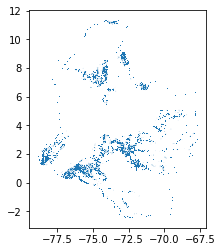

In [26]:
df[df.date == "2002-12-31"].plot()

In [1]:


import fileinput

directory = "/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/fb_mobility/movement_between_tiles"

i = 1
for file in os.listdir(directory):
    if file.endswith('.csv'):
        print(f"{i}: {file}")
        i+=1
        with fileinput.FileInput(os.path.join(directory, file), inplace=True, backup='.bak') as file:
            for line in file:
                print(line.replace("Bogotá, D.C.", "Bogotá D.C."), end='')

1: 1442706159202263_2020-05-12_0800.csv
2: 1442706159202263_2020-05-10_0000.csv
3: 1442706159202263_2020-11-18_0000.csv
4: 1442706159202263_2020-04-16_1600.csv
5: 1442706159202263_2020-07-24_0800.csv
6: 1442706159202263_2020-11-06_1600.csv
7: 1442706159202263_2020-10-15_0000.csv
8: 1442706159202263_2020-12-02_1600.csv
9: 1442706159202263_2021-01-09_0000.csv
10: 1442706159202263_2020-09-10_1600.csv
11: 1442706159202263_2021-03-12_1600.csv
12: 1442706159202263_2020-09-09_0800.csv
13: 1442706159202263_2021-06-06_1600.csv
14: 1442706159202263_2020-12-01_0800.csv
15: 1442706159202263_2021-05-24_0000.csv
16: 1442706159202263_2020-09-30_1600.csv
17: 1442706159202263_2020-11-18_1600.csv
18: 1442706159202263_2020-05-03_0800.csv
19: 1442706159202263_2020-05-15_1600.csv
20: 1442706159202263_2021-01-01_0800.csv
21: 1442706159202263_2020-07-17_1600.csv
22: 1442706159202263_2020-07-03_1600.csv
23: 1442706159202263_2020-04-15_0000.csv
24: 1442706159202263_2020-10-03_0800.csv
25: 1442706159202263_2020